## get the china provinces shapely form

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import geopandas as gpd
import os.path
#fig = plt.figure()




In [24]:
NATURAL_EARTH_RESOLUTION = '10m' # 1:10m scale
NATURAL_EARTH_DATA_SET = 'admin_1_states_provinces'
CRS = 4326 # WGS84

def make_province_shape_file(country_iso2_code = 'CN', output_file="../data/province_shapes/CHN_adm1.shp"):

    shpfilename = shpreader.natural_earth(resolution=NATURAL_EARTH_RESOLUTION,
                                    category='cultural',
                                    name=NATURAL_EARTH_DATA_SET)
    reader = shpreader.Reader(shpfilename)
    print("downloaded succesfully")
    provinces_states = reader.records()

    def filter_country_code(records:object, target_iso_a2_code = 'CN')->list:
        """filter provincial/state (admin level 1) records for one country

        Args:
            records (shpreader.Reader.records): the records object from cartopy shpreader for natural earth dataset
            target_iso_a2_code (str, optional): the country code (iso_a2) for which provincial records will be extracted. Defaults to 'CN'.

        Returns:
            list: records list
        """    
        results = []
        for rec in records:
            if rec.attributes['iso_a2'] == target_iso_a2_code:
                results.append(rec)
        
        return results
    
    provinces_states = filter_country_code(provinces_states, target_iso_a2_code=country_iso2_code)


    gdf = gpd.GeoDataFrame(geometry=[r.geometry for r in res])
    gdf.set_crs(epsg=CRS, inplace=True)  # WGS84
    gdf.to_file(os.path.abspath(output_file))

make_province_shape_file()

downloaded succesfully


In [12]:
r = res[0]


<Axes: >

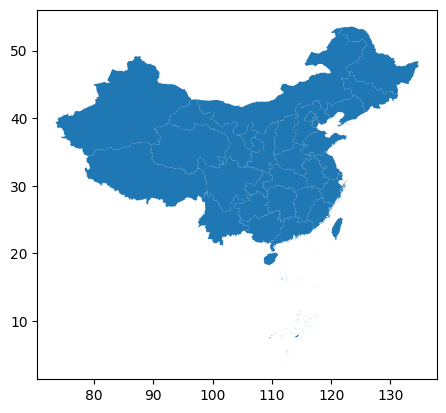

In [21]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(geometry=[r.geometry for r in res])
gdf.set_crs(epsg=4326, inplace=True)  # WGS84
gdf.to_file("../data/test.shp")

<Axes: >

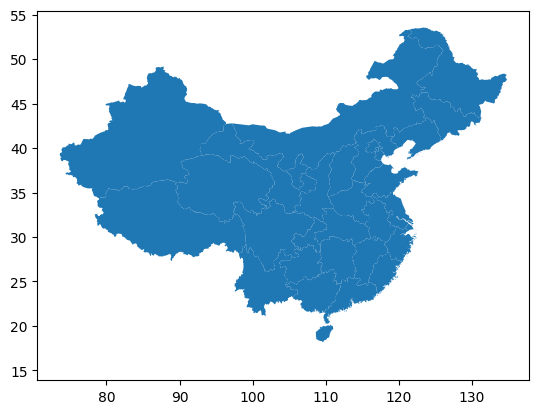

In [15]:
gdf.plot()

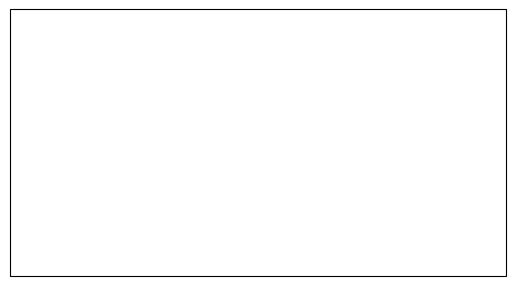

In [9]:
ax = plt.axes(projection=ccrs.Mercator(min_latitude=-57,max_latitude=77,central_longitude=10))
#ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
#ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
#ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-150, 60, -25, 60])